# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


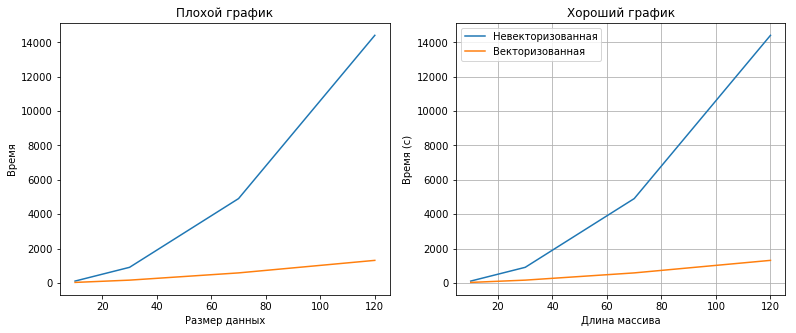

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

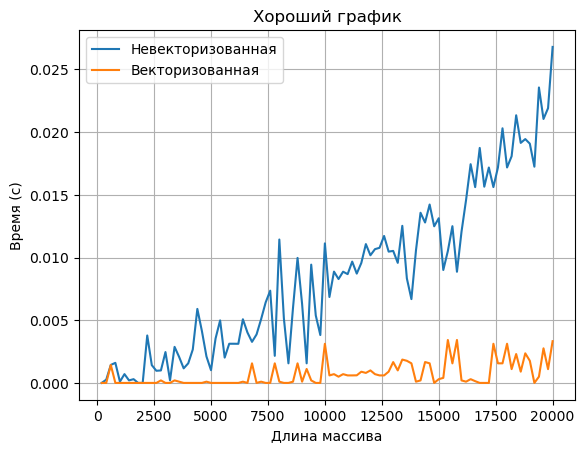

In [1]:
import time
import random as rnd
import matplotlib.pyplot as plt
import numpy as np

import functions as nonvec
import functions_vectorized as vec

def gen_arr(n, m):
    y = np.random.sample((n, m))
    return y

data_size = []
time_non_vectorized = []
time_vectorized = []

for i in range(100):
    sz = i + 1
    sz *= 200
    data_size.append(sz)
    time_non_vec = 0
    time_vec = 0
    for j in range(10):
        x = gen_arr(sz, sz)
        start = time.time();
        nonvec.prod_non_zero_diag(x)
        time_non_vec += (time.time() - start)
        start = time.time();
        vec.prod_non_zero_diag(x)
        time_vec += (time.time() - start)
    time_non_vectorized.append(time_non_vec / 10.0)
    time_vectorized.append(time_vec / 10.0)
plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.title(u"Хороший график")
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")
plt.grid()
plt.legend()

plt.show()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


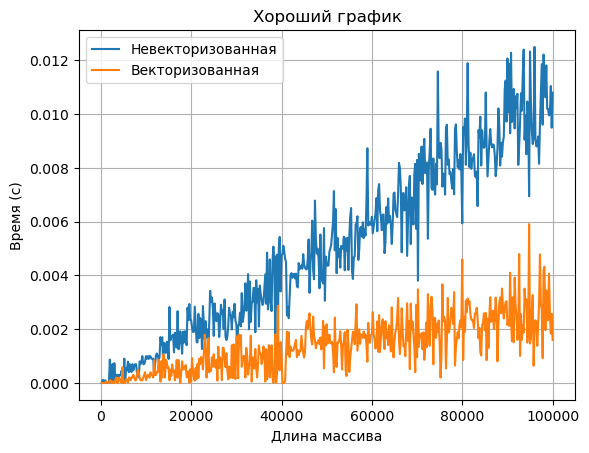

In [4]:
import time
import random as rnd
import matplotlib.pyplot as plt
import numpy as np

import functions as nonvec
import functions_vectorized as vec

def gen_arr(n):
    z = np.random.randint(max(n/10, 1000), size = n)
    return z

data_size = []
time_non_vectorized = []
time_vectorized = []

for i in range(500):
    sz = i + 1
    sz *= 200
    data_size.append(sz)
    time_non_vec = 0
    time_vec = 0
    for j in range(10):
        x = gen_arr(sz)
        y = gen_arr(sz)
        start = time.time();
        nonvec.are_multisets_equal(x, y)
        time_non_vec += (time.time() - start)
        start = time.time();
        vec.are_multisets_equal(x, y)
        time_vec += (time.time() - start)
    time_non_vectorized.append(time_non_vec / 10.0)
    time_vectorized.append(time_vec / 10.0)
plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.title(u"Хороший график")
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")
plt.grid()
plt.legend()
plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

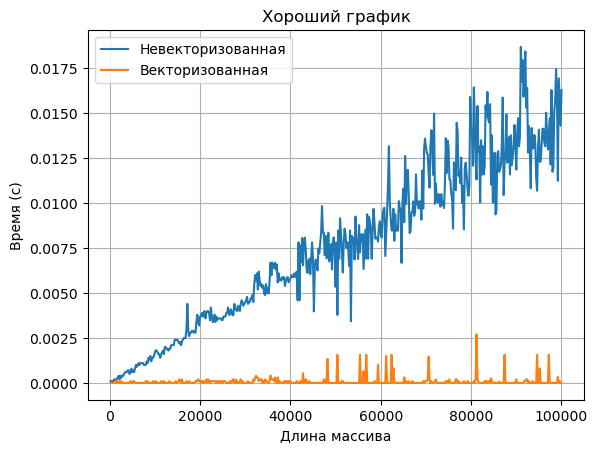

In [1]:
import time
import random as rnd
import matplotlib.pyplot as plt
import numpy as np


import functions as nonvec
import functions_vectorized as vec


def gen_arr(n):
    z = np.random.randint(100, size = n)
    z[0] = 0
    return z
data_size = []
time_non_vectorized = []
time_vectorized = []

for i in range(500):
    sz = i + 1
    sz *= 200
    data_size.append(sz)
    time_non_vec = 0
    time_vec = 0
    for j in range(10):
        x = gen_arr(sz)
        start = time.time();
        nonvec.max_after_zero(x)
        time_non_vec += (time.time() - start)
        start = time.time();
        vec.max_after_zero(x)
        time_vec += (time.time() - start)
    time_non_vectorized.append(time_non_vec / 10.0)
    time_vectorized.append(time_vec / 10.0)
plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.title(u"Хороший график")
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")
plt.grid()
plt.legend()
plt.show()


 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


Первая картинка
Векторизованная функция работает за 0.04862570762634277
Невекторизованная функция работает за 2.535468816757202
Вторая картинка
Векторизованная функция работает за 0.026432514190673828
Невекторизованная функция работает за 1.1160211563110352


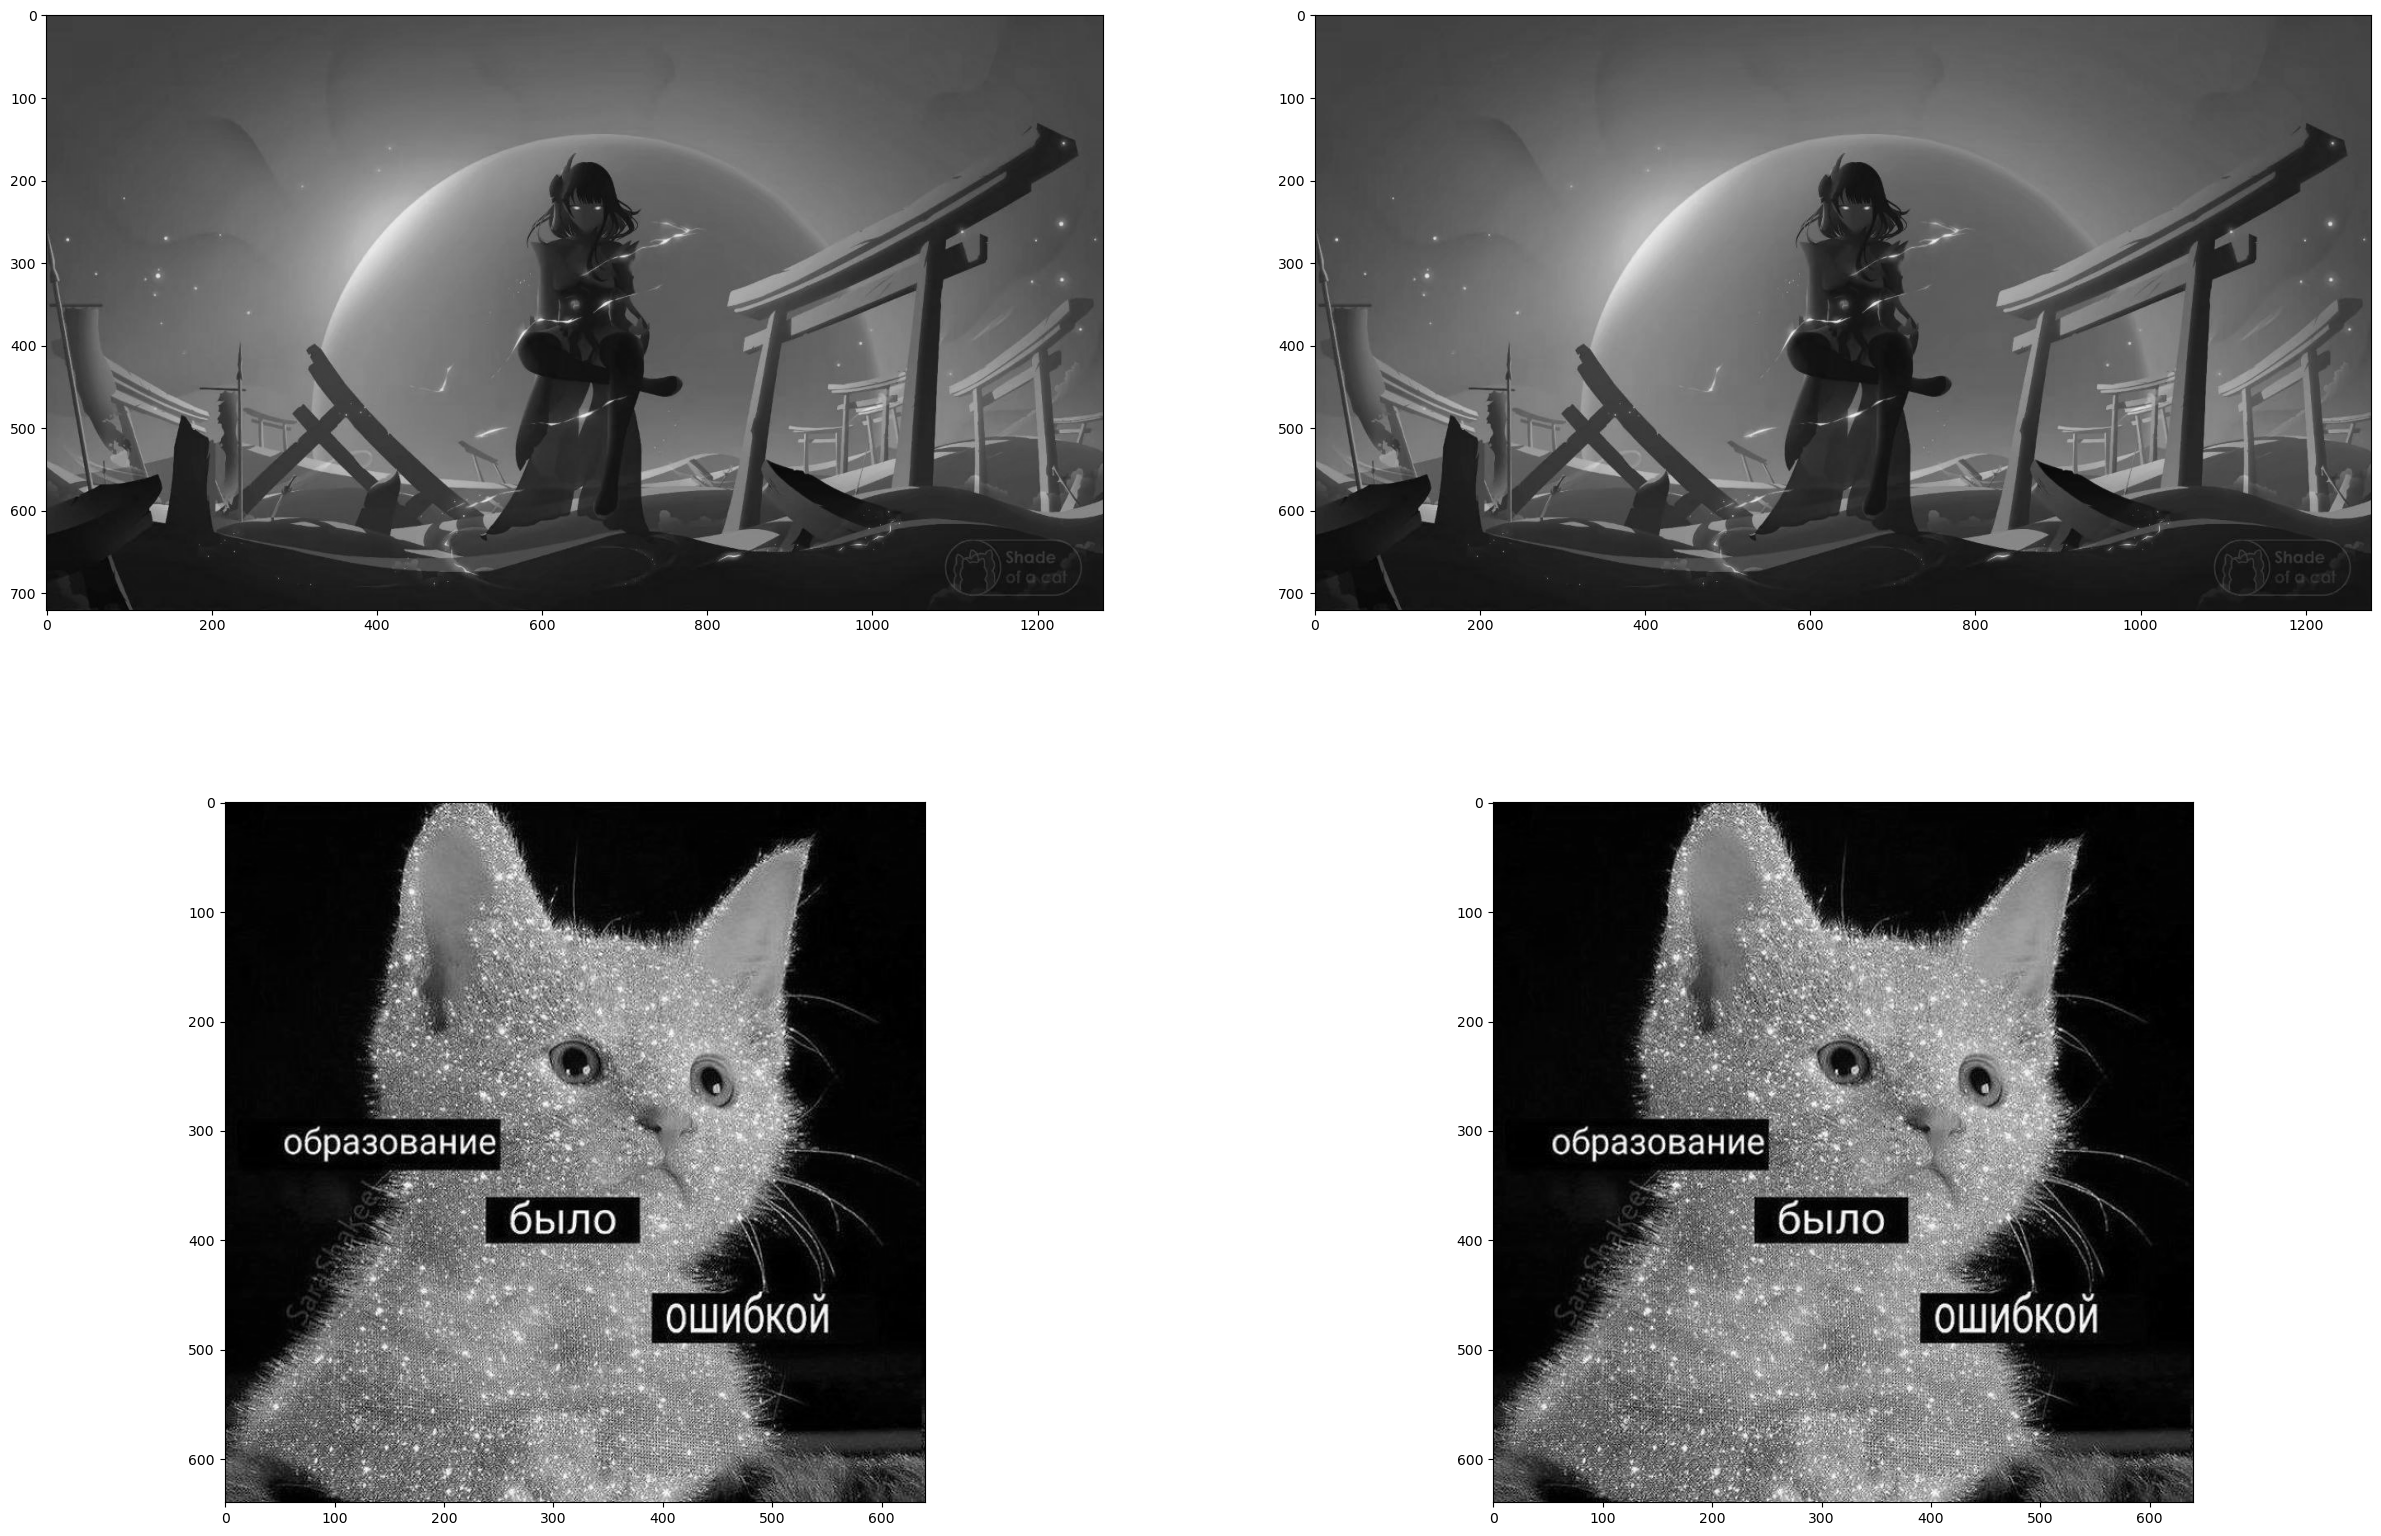

In [23]:
import time
import random as rnd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import functions as nonvec
import functions_vectorized as vec

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 20))

print("Первая картинка")

img = np.asarray(Image.open('Ra.jpg').convert('RGB'))
coefs = np.array([0.299, 0.587, 0.114])

arr = np.copy(img)
start = time.time()
arr = Image.fromarray(vec.convert_image(arr, coefs)).convert('RGB')
print("Векторизованная функция работает за", time.time() - start)
ax1.imshow(arr)

arr = np.copy(img)
start = time.time()
arr = Image.fromarray(nonvec.convert_image(arr, coefs)).convert('RGB')
print("Невекторизованная функция работает за", time.time() - start)
ax2.imshow(arr)

print("Вторая картинка")
img = np.asarray(Image.open('cat.jpg').convert('RGB'))

arr = np.copy(img)
start = time.time()
arr = Image.fromarray(vec.convert_image(arr, coefs)).convert('RGB')
print("Векторизованная функция работает за", time.time() - start)
ax3.imshow(arr)

arr = np.copy(img)
start = time.time()
arr = Image.fromarray(nonvec.convert_image(arr, coefs)).convert('RGB')
print("Невекторизованная функция работает за", time.time() - start)
ax4.imshow(arr)
plt.show()


* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

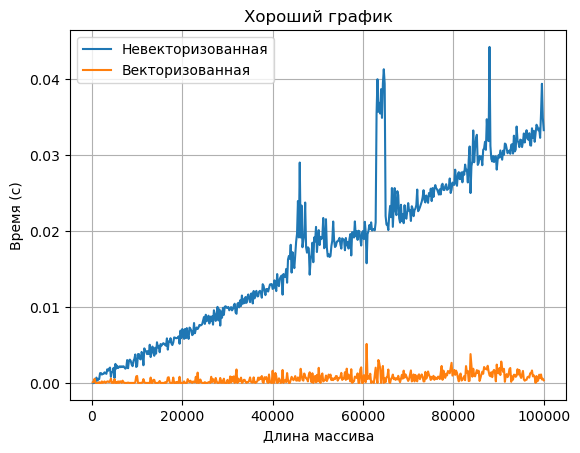

In [2]:
import time
import random as rnd
import matplotlib.pyplot as plt
import numpy as np


import functions as nonvec
import functions_vectorized as vec


def gen_arr(n):
    z = np.random.randint(100, size = n)
    return z
data_size = []
time_non_vectorized = []
time_vectorized = []

for i in range(500):
    sz = i + 1
    sz *= 200
    data_size.append(sz)
    time_non_vec = 0
    time_vec = 0
    for j in range(10):
        x = gen_arr(sz)
        start = time.time();
        nonvec.run_length_encoding(x)
        time_non_vec += (time.time() - start)
        start = time.time();
        vec.run_length_encoding(x)
        time_vec += (time.time() - start)
    time_non_vectorized.append(time_non_vec / 10.0)
    time_vectorized.append(time_vec / 10.0)
plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.title(u"Хороший график")
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")
plt.grid()
plt.legend()
plt.show()


 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

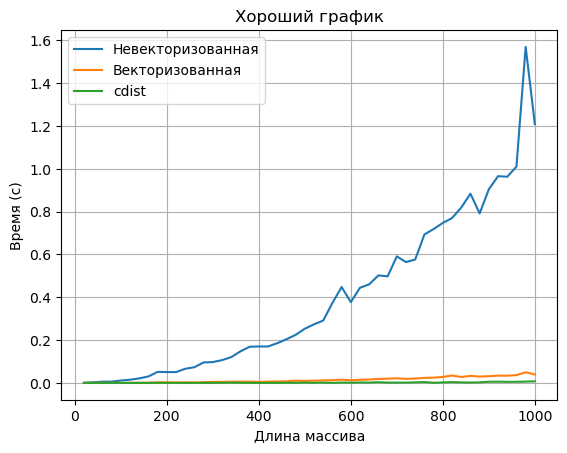

In [1]:
import time
import random as rnd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

import functions as nonvec
import functions_vectorized as vec

def gen_arr(n):
    y = np.array([np.random.sample(2) for _ in range(n)])
    return y

def dc_dist(x, y):
    return distance.cdist(x, y, 'euclidean')

data_size = []
time_non_vectorized = []
time_vectorized = []
time_cd_sad = []

for i in range(50):
    #316
    sz = (i + 1) * 20
    data_size.append(sz)
    time_non_vec = 0
    time_vec = 0
    time_sad = 0
    for j in range(10):
        x = gen_arr(sz)
        y = gen_arr(sz)
        start = time.time();
        nonvec.pairwise_distance(x, y)
        time_non_vec += (time.time() - start)
        start = time.time();
        vec.pairwise_distance(x, y)
        time_vec += (time.time() - start)
        start = time.time();
        dc_dist(x, y)
        time_sad += (time.time() - start)
    time_non_vectorized.append(time_non_vec / 10.0)
    time_vectorized.append(time_vec / 10.0)
    time_cd_sad.append(time_sad / 10.0)
plt.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
plt.plot(data_size, time_vectorized, label=u"Векторизованная")
plt.plot(data_size, time_cd_sad, label=u"cdist")
plt.title(u"Хороший график")
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время (с)")
plt.grid()
plt.legend()

plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

#### Работа по МЛ

Чтож, было ~~легко~~сложно, мой ноут пару раз завис).
Пользовался помощью **Газизова** и **Кухаренко**. Пару кодов переписал, но разобрался, достаточно *сложно* находить функции необходимые для решения задач.


__Игра МЛ__

Есть такая игра **Mobile Legends** из достижений могу сказать  
1. Апал миф честь
2. Был топ 10 России На Белерике(До новой системы рейтинга, есть скрин) 
3. Основная роль танк

